<a href="https://colab.research.google.com/github/d-vf/notebooks/blob/master/HW_R_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### R kernel
https://github.com/IRkernel/IRkernel

In [5]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [0]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

## Libraries

In [7]:
install.packages('codetools') #Code Analysis Tools for R
install.packages('data.table') #Fast aggregation of large data (not needed as 20 0000 is a small sample)
install.packages('ggplot2') #for basic charts this is not needed (as has a learning curve)
install.packages('stargazer') #beautiful LATEX, HTML and ASCII tables from R statistical output (not needed as the output is not latex and be used UTF-8)
install.packages('lmtest') #Testing Linear Regression Models
install.packages('dplyr') # A Grammar of Data Manipulation (to replace data.table)
install.packages('aod')
install.packages('mfx') #for marginal effects

install.packages('mice') # for missing data
install.packages('VIM') # or missing data

install.packages('gsheet') #for reading from gsheet (sliced file)
install.packages('GGally') # corr plot and consusion matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# HomeWork Assignment I
## Data description, Single Regression and Multiple Regression

Objective: Work through data, present rich descriptive statistics and build some models. Some hints:
* Set a general research question in a topic of your interest
* Select the data
* Create the variables you need for the analysis
* Explore and describe the data and show some statistics
* Perform single regressions and explain the importance of the variables used
* Perform multiple regression and explain clearly

Page limit: 3 pages.
The evaluation will take into account the following key factors:
 * Data analysis
 * Interpretation and clear explanation of results



## Research Question: 

Factors that influence having the ability to Afford keeping your home adequately warm, where dependeant variable, dichotomous is "Afford keeping your home adequately warm" (Y16_Q89a) and takes 0 as Yes and 1 as not and the independant variables (preditor) are:

- Arrears in utility bills, such as electricity, water, gas (dichotomous, 0 and 1)
- Equivalised monthly household income in PPP euros (continuous)

Data: Dataset:European Quality of Life Survey Integrated Data File, 2003-2016
Source: https://beta.ukdataservice.ac.uk/

Background: Energy Poverty can be measure by the ability to Afford keeping your home adequately warm (Y16_Q89a)




In [0]:
library(readr)
url <- "/eqls_integrated_trend_2003_2016.csv"
data <- read.csv(url, header=TRUE, quote="\"", na.strings = "NA", fill = TRUE )
#summary(data)

## Filter PT

(it was filtered by PT) as PT has a higher % of enery poverty compared with another EU contries

In [0]:
dataPT <- subset(data, Y16_Country=='23')

## Alternative filtered file

In [0]:
write_csv(dataPT, path = "dataPT.csv") #/content/dataPT.csv

In [0]:
library(gsheet)
url <-gsheet2tbl('https://docs.google.com/spreadsheets/d/122cHA11edHVY2KdRU2eZIb4EJrcMsOzaDcCucs1zr_I/edit#gid=75732280')
dataPTGS <- as.data.frame(url, header=TRUE)

# Select Variables

Description of the variables: 
* Y16_Q89a (Afford keeping your home adequately warm)

* Y16_Income_Equivalised (Equivalised monthly household income in PPP euros)
* Y16_Q93b (Arrears in utility bills, such as electricity, water, gas)


# does not have
* Y16_Q97B Variable (What range best matches your household's total net monthly income?
* Y16_Q25f (Lack of facilities (heating or cooling) to keep a comfortable temperature at home)

* Y16_Q53 (Urbanisation (subjective)
unbalanced


In [0]:
dataPTsample <- data.frame(dataPT$Y16_Q89a, dataPT$Y16_Income_Equivalised, dataPT$Y16_Q93b)

In [0]:
#removing NA's
#dataPTsample <- dataPTsample[complete.cases(dataPTsample), ]

## Initial inspection

In [13]:
summary(dataPTsample) 

 dataPT.Y16_Q89a  dataPT.Y16_Income_Equivalised dataPT.Y16_Q93b 
 Min.   : 1.000   Min.   :   1.212              Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 383.142              1st Qu.: 2.000  
 Median : 1.000   Median : 629.723              Median : 2.000  
 Mean   : 2.649   Mean   : 825.679              Mean   : 2.534  
 3rd Qu.: 2.000   3rd Qu.: 979.431              3rd Qu.: 2.000  
 Max.   :99.000   Max.   :9760.705              Max.   :99.000  
                  NA's   :1592                                  

### Missing values

In [14]:
library(mice)
library(VIM)


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep





 Variables sorted by number of missings: 
                      Variable     Count
 dataPT.Y16_Income_Equivalised 0.3901005
               dataPT.Y16_Q89a 0.0000000
               dataPT.Y16_Q93b 0.0000000


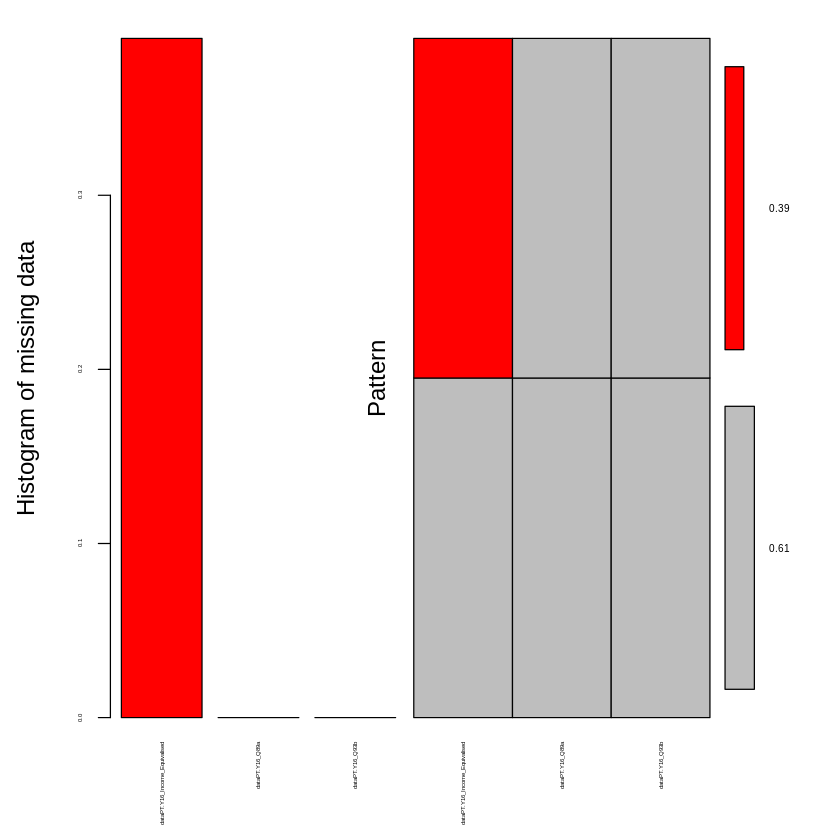

In [15]:
aggr_plot <- aggr(dataPTsample, col=c('grey','red'), numbers=TRUE, sortVars=TRUE, labels=names(dataPTsample), cex.axis=.3,cex.numbers=0.5, gap=0.3, ylab=c("Histogram of missing data","Pattern"), width=9, height=6)

- Removing all dataPT.Y16_Income_Equivalised with NA would change the sample (almost 40%)

- For dependant with Value = 99.0 Label = (Refusal)  and Value = 98.0 Label = (Don't know) will be removed (as it is 0/1 probability). Multinomial probit model is not justified as it would e for 56 cases.

- For categorical 98 and 99,can be coded as separate grup besides (0 and 1), keeping those observations

## Clean up 


## Remove:

Value = 99.0	Label = (Refusal)
Value = 98.0	Label = (Don't know)

## Replace

Value = 1.0	Label = Yes, can afford if want -> 0

Value = 2.0	Label = No, cannot afford it -> 1

## Set as factor 
(0/1)



## Depedant (response) Variable)

### Y16_Q89a Variable label = Afford keeping your home adequately warm

* Frequency table (dependant variable)

In [16]:
table <- table(dataPTsample$dataPT.Y16_Q89a)
table


   1    2   98   99 
2731 1294   52    4 

* Proportions

In [17]:
prop.table(table)


           1            2           98           99 
0.6691987258 0.3170791473 0.0127419750 0.0009801519 

For dependant with Value = 99.0 Label = (Refusal) and Value = 98.0 Label = (Don't know) will be removed (as it is 0/1 probability). Multinomial probit model is not justified as it would be for 56 cases.

In [0]:
dataPTsample <- subset(dataPTsample, dataPT.Y16_Q89a != '99' & dataPT.Y16_Q89a!= '98')

Value = 1.0 Label = Yes, can afford if want -> 0

Value = 2.0 Label = No, cannot afford it -> 1

Set as factor (0 & 1)

In [0]:
dataPTsample$dataPT.Y16_Q89a[dataPTsample$dataPT.Y16_Q89a == 1] <- 0

In [0]:
dataPTsample$dataPT.Y16_Q89a[dataPTsample$dataPT.Y16_Q89a == 2] <- 1

In [21]:
head(dataPTsample$dataPT.Y16_Q89a)

[1] 0 0 0 0 0 0

In [0]:
dataPTsample$dataPT.Y16_Q89a <- as.factor(dataPTsample$dataPT.Y16_Q89a)

In [23]:
summary(dataPTsample$dataPT.Y16_Q89a)

0    1 
2731 1294

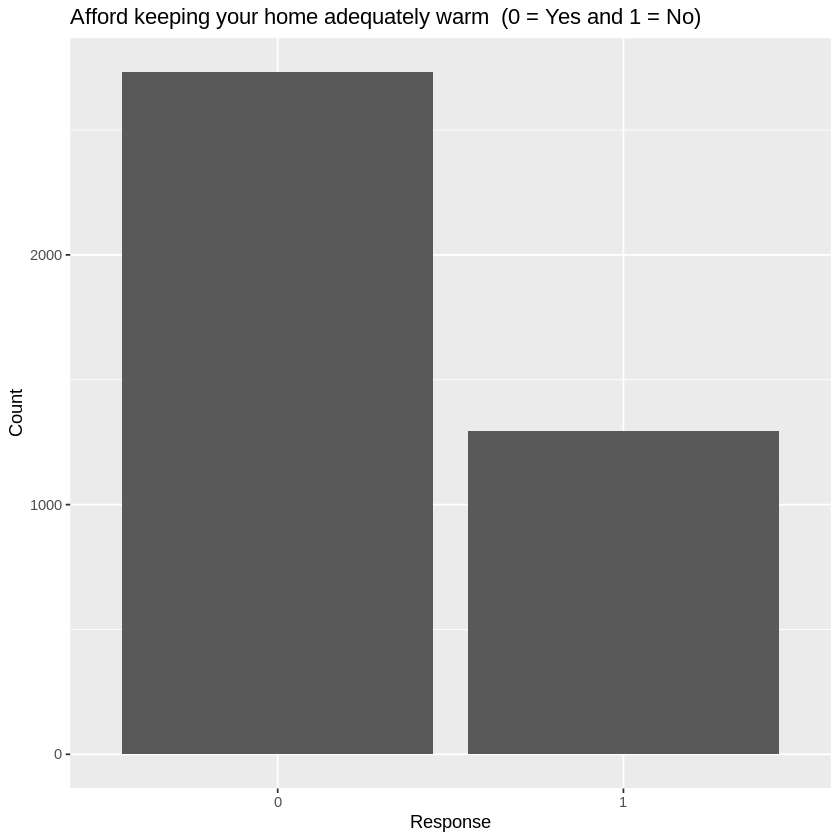

In [24]:
library(ggplot2)
#plot(dataPTsample$dataPT.Y16_Q89a)
g <- ggplot(dataPTsample, aes(dataPT.Y16_Q89a))
# Number of cars in each class:
g + geom_bar() + labs(title= "Afford keeping your home adequately warm \ (0 = Yes and 1 = No)",  y="Count", x = "Response")

In [25]:
table1 <- table(dataPTsample$dataPT.Y16_Q89a)
table1


   0    1 
2731 1294 

In [26]:
prop.table(table1)


        0         1 
0.6785093 0.3214907 

## Predictors

### Y16_Q93b	Variable label = Arrears in utility bills, such as electricity, water, gas


In [27]:
summary(dataPTsample$dataPT.Y16_Q93b)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.448   2.000  99.000 

In [28]:
table3 <- table(dataPTsample$dataPT.Y16_Q93b)
table3


   1    2   98   99 
 407 3595   22    1 

In [29]:
prop.table(table3)


           1            2           98           99 
0.1011180124 0.8931677019 0.0054658385 0.0002484472 

In [0]:
is.nan.data.frame <- function(x)
  do.call(cbind, lapply(x, is.nan))

dataPTsample$dataPT.Y16_Q93b[is.nan(dataPTsample$dataPT.Y16_Q93b)] <- NA

- For categorical 98 and 99,can be coded as separate grup besides (0 and 1), keeping those observations

In [0]:
dataPTsample$dataPT.Y16_Q93b <- as.factor(dataPTsample$dataPT.Y16_Q93b)

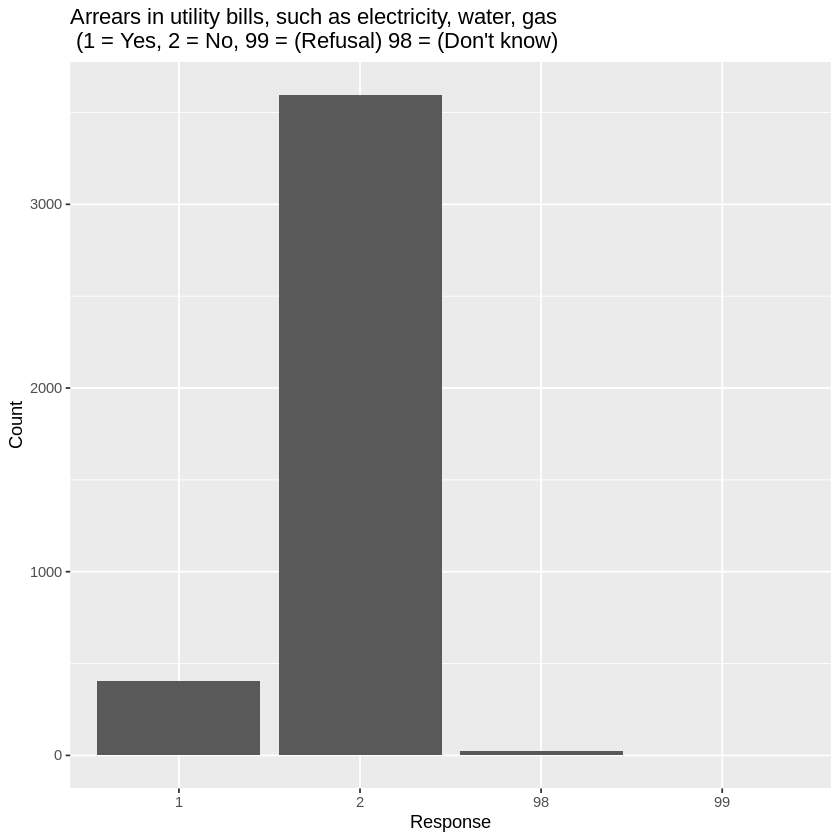

In [32]:
g1 <- ggplot(dataPTsample, aes(dataPT.Y16_Q93b))
# Number of cars in each class:
g1 + geom_bar() + labs(title= "Arrears in utility bills, such as electricity, water, gas 
 (1 = Yes, 2 = No, 99 = (Refusal) 98 = (Don't know)",  y="Count", x = "Response")

In [33]:
summary(dataPTsample$dataPT.Y16_Q93b)

1    2   98   99 
 407 3595   22    1

In [34]:
table4 <- table(dataPTsample$dataPT.Y16_Q93b)
table4


   1    2   98   99 
 407 3595   22    1 

In [35]:
prop.table(table4)


           1            2           98           99 
0.1011180124 0.8931677019 0.0054658385 0.0002484472 

### Y16_Income_Equivalised Variable label = Equivalised monthly household income in PPP euros



In [36]:
summary(dataPTsample$dataPT.Y16_Income_Equivalised)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   1.212  389.177  629.723  828.742  992.212 9760.705     1561 


 Variables sorted by number of missings: 
                      Variable     Count
 dataPT.Y16_Income_Equivalised 0.3878261
               dataPT.Y16_Q89a 0.0000000
               dataPT.Y16_Q93b 0.0000000


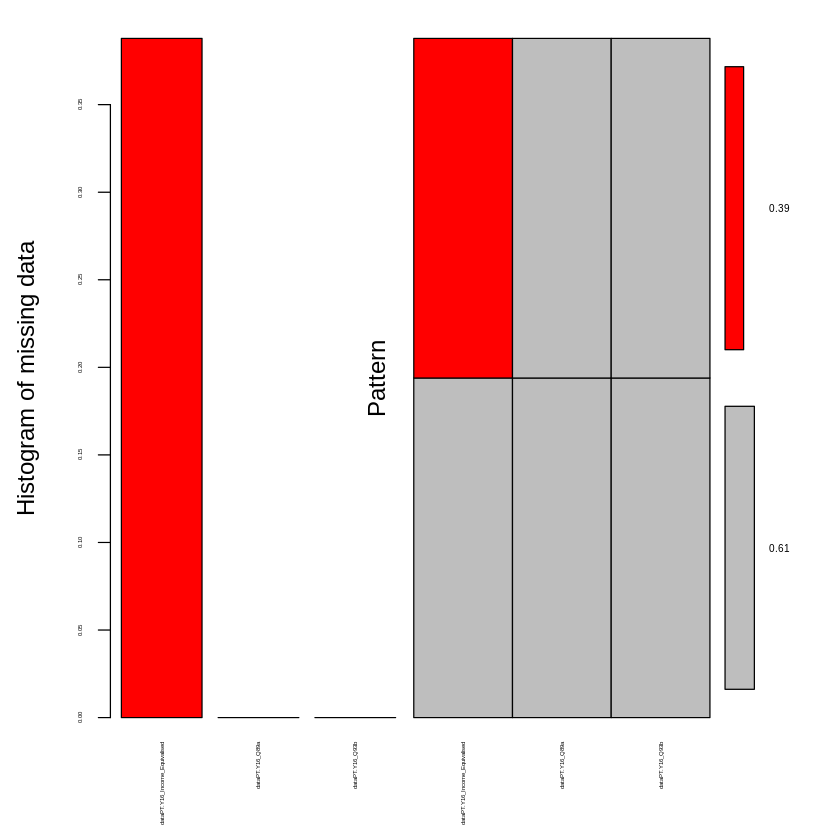

In [37]:
aggr_plot <- aggr(dataPTsample, col=c('grey','red'), numbers=TRUE, sortVars=TRUE, labels=names(dataPTsample), cex.axis=.3,cex.numbers=0.5, gap=0.3, ylab=c("Histogram of missing data","Pattern"), width=9, height=6)

### Explaining imputation and reasoning

* Rubin's theory on this: Inference and Missing Data, https://www.jstor.org/stable/2335739?seq=1

* MCAR, MAR and MNAR: MCAR, MAR and MNAR: https://stefvanbuuren.name/fimd/sec-MCAR.html

* In this case they are actual missing (not refusal or don´t know, or 98 or 99 codes)

* Also, BAT'S would say that more than 25% missing would lead to not use the variable of this dataset;

* Impact of other approaches (as would lead to change the sample), i.e. remove all obervations that this variable is missing -> would lead to cut more than 40% of the sample and increase probabulity (to more than 50%, from original 30%

* There aren´t many substitive proxies (as net income, etc)

* Just using arreas is somehow a mirroed or consequent effect. Also there are no answers related to equipment (as ability to keep house warm could be due to fix assets or opex (where arreas reflect more opex). As well know, energy conservation measuares demands invesment on capex level and opex is somehow dependant on capex. 

* There is also some inequality as someone with better housing will need less energy (or waste less energy), unfortunally witouth the parameter refered supra is not possible to access. 


In [38]:
library(mice)
library(VIM)
require(rpart)
require(lattice)

Loading required package: rpart

Loading required package: lattice



Methods

Imputation by predictive mean matching (pmm) using

R package: Multivariate Imputation by Chained Equations (MICE)

In [39]:
imp <- mice(dataPTsample, meth = "pmm", minbucket = 10) 


 iter imp variable
  1   1  dataPT.Y16_Income_Equivalised
  1   2  dataPT.Y16_Income_Equivalised
  1   3  dataPT.Y16_Income_Equivalised
  1   4  dataPT.Y16_Income_Equivalised
  1   5  dataPT.Y16_Income_Equivalised
  2   1  dataPT.Y16_Income_Equivalised
  2   2  dataPT.Y16_Income_Equivalised
  2   3  dataPT.Y16_Income_Equivalised
  2   4  dataPT.Y16_Income_Equivalised
  2   5  dataPT.Y16_Income_Equivalised
  3   1  dataPT.Y16_Income_Equivalised
  3   2  dataPT.Y16_Income_Equivalised
  3   3  dataPT.Y16_Income_Equivalised
  3   4  dataPT.Y16_Income_Equivalised
  3   5  dataPT.Y16_Income_Equivalised
  4   1  dataPT.Y16_Income_Equivalised
  4   2  dataPT.Y16_Income_Equivalised
  4   3  dataPT.Y16_Income_Equivalised
  4   4  dataPT.Y16_Income_Equivalised
  4   5  dataPT.Y16_Income_Equivalised
  5   1  dataPT.Y16_Income_Equivalised
  5   2  dataPT.Y16_Income_Equivalised
  5   3  dataPT.Y16_Income_Equivalised
  5   4  dataPT.Y16_Income_Equivalised
  5   5  dataPT.Y16_Income_Equivalised


Warning message:
“Number of logged events: 25”


In [40]:
summary(imp$chainMean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  852.2   866.3   886.0   887.4   910.0   930.6      50 

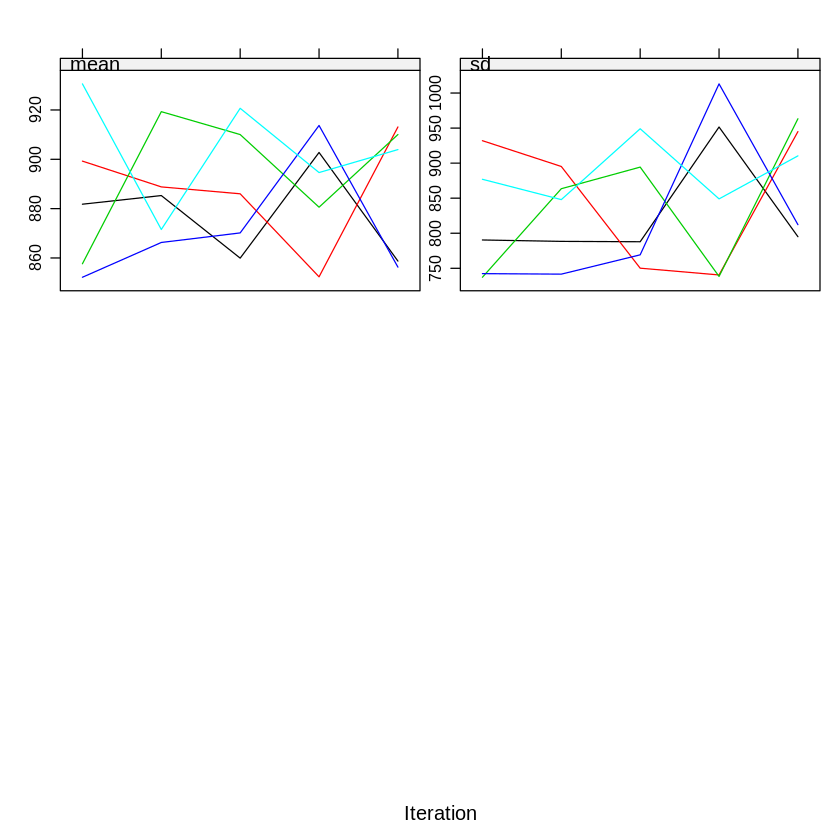

In [41]:
plot(imp)

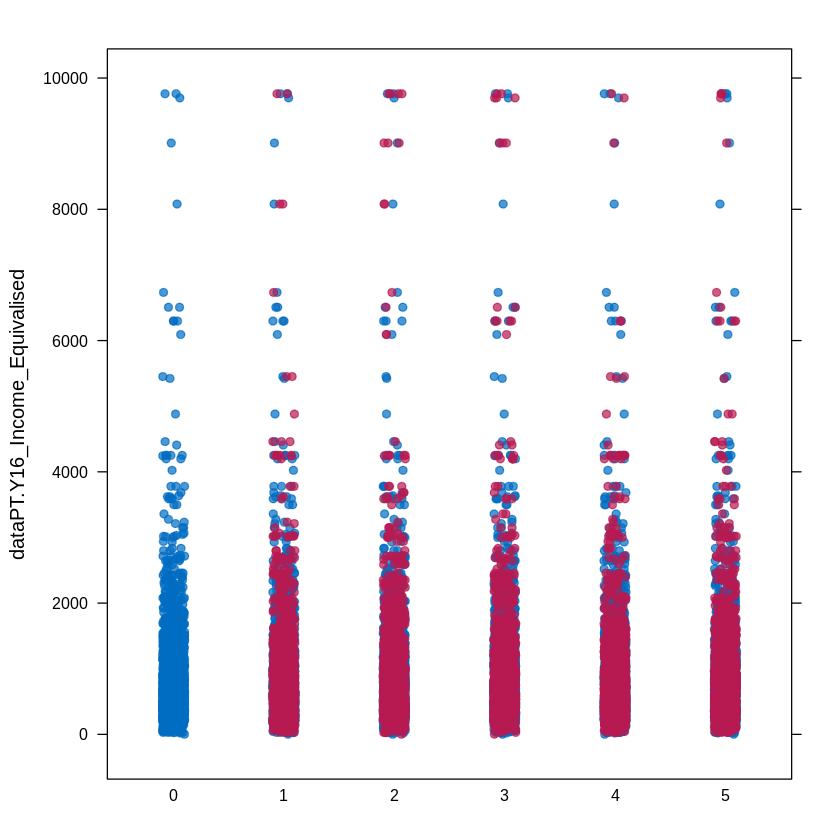

In [42]:
stripplot(imp, pch = 20, cex = 1.2)

In [43]:
imp$method

dataPT.Y16_Q89a dataPT.Y16_Income_Equivalised 
                           ""                         "pmm" 
              dataPT.Y16_Q93b 
                           ""

Actual (blue) and generated samples (red)

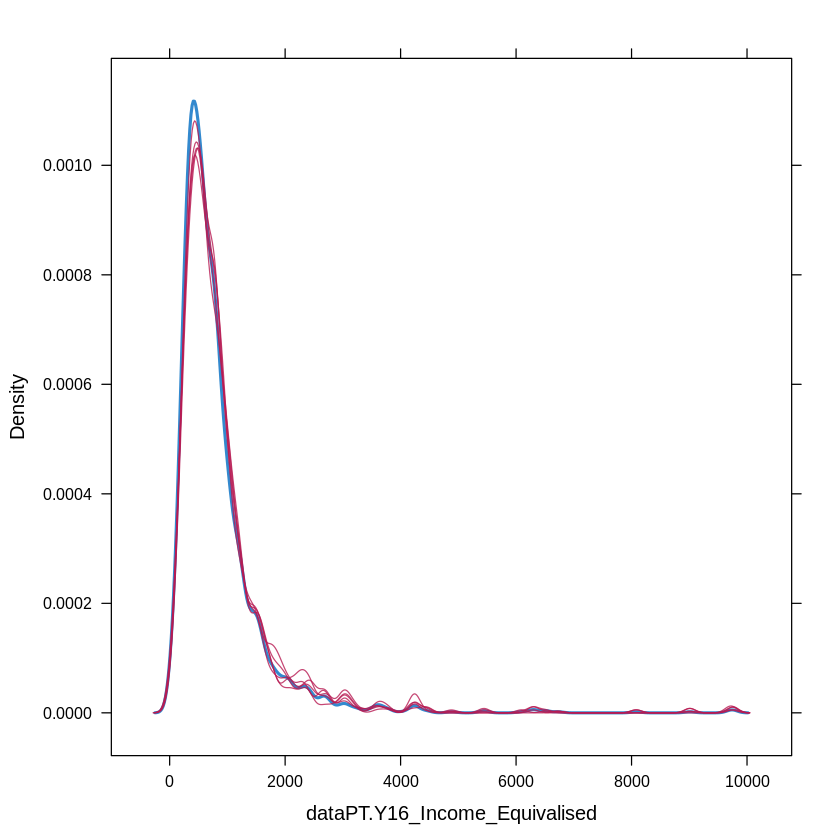

In [44]:
densityplot(imp)

In [45]:
#Get completed datasets (observed and imputed)
dataPTsample_imp <- complete(imp,1) #it can be chosen
summary(dataPTsample_imp)

 dataPT.Y16_Q89a dataPT.Y16_Income_Equivalised dataPT.Y16_Q93b
 0:2731          Min.   :   1.212              1 : 407        
 1:1294          1st Qu.: 404.040              2 :3595        
                 Median : 646.085              98:  22        
                 Mean   : 840.375              99:   1        
                 3rd Qu.: 997.980                             
                 Max.   :9760.705                             

In [46]:
dataPTsample_imp

dataPT.Y16_Q89a,dataPT.Y16_Income_Equivalised,dataPT.Y16_Q93b
<fct>,<dbl>,<fct>
0,1763.22418,2
0,827.58618,2
0,526.02020,2
0,1133.50126,2
0,356.30054,2
0,721.15229,2
0,663.94613,2
1,1442.30458,2
1,1175.31671,1


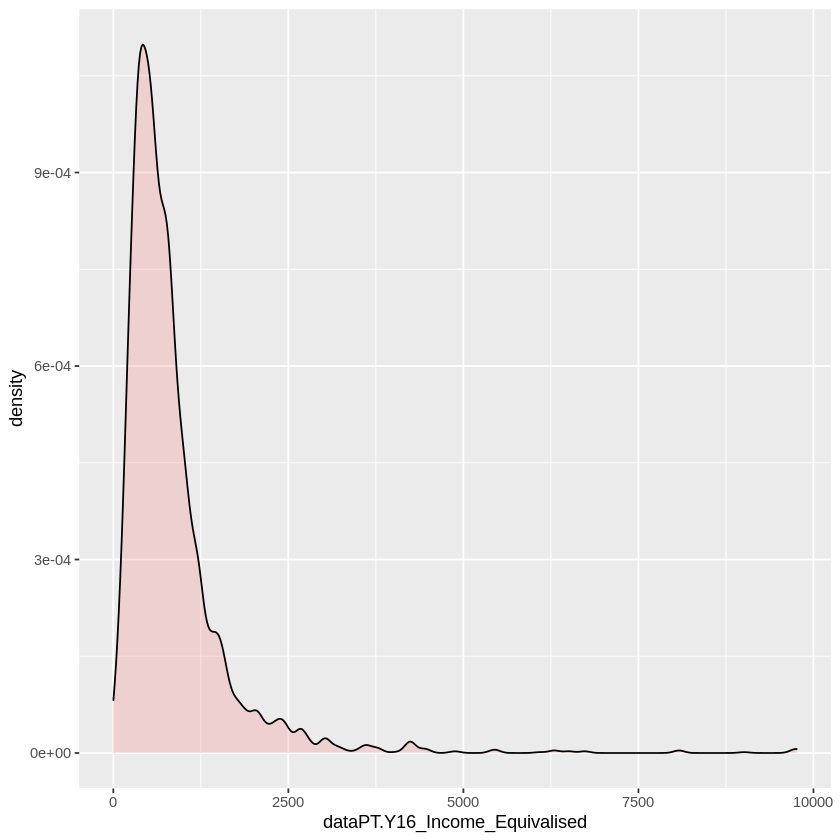

In [47]:
# Histogram with kernel density curve
ggplot(dataPTsample_imp, aes(x = dataPT.Y16_Income_Equivalised)) +
    geom_density(alpha = .2, fill = "#FF6666")

### Transform -> log

In [0]:
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log <- log(dataPTsample_imp$dataPT.Y16_Income_Equivalise)

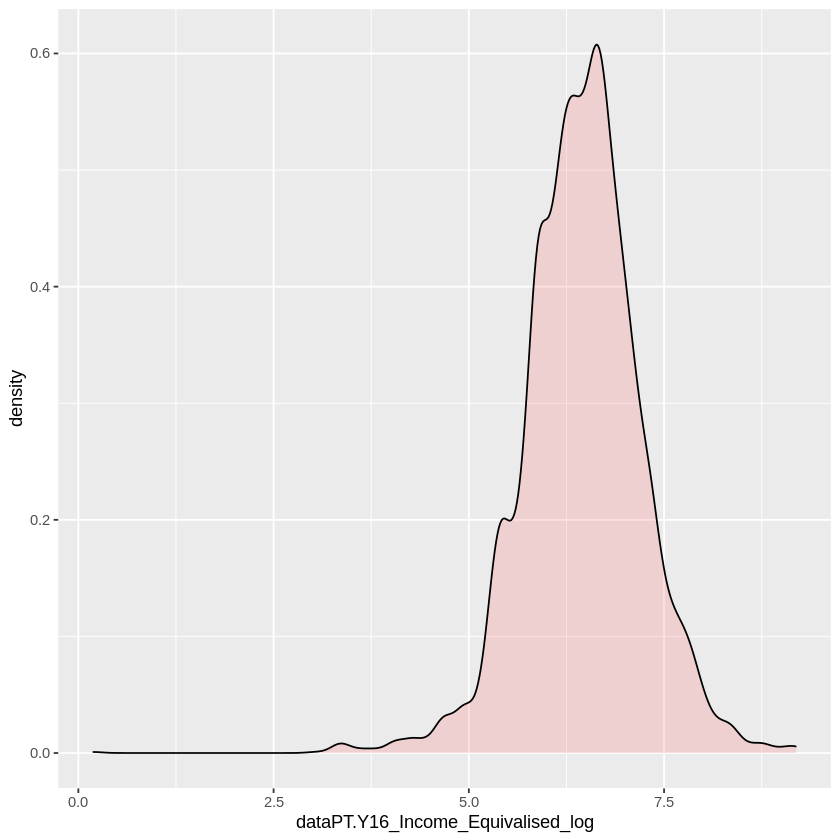

In [49]:
# Histogram with kernel density curve
ggplot(dataPTsample_imp, aes(x = dataPT.Y16_Income_Equivalised_log)) +
    geom_density(alpha = .2, fill = "#FF6666")

In [0]:
dataPTsample_imp$dataPT.Y16_Q89a <- as.factor(dataPTsample_imp$dataPT.Y16_Q89a)
dataPTsample_imp$dataPT.Y16_Income_Equivalised <- as.numeric(dataPTsample_imp$dataPT.Y16_Income_Equivalised)
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log <- as.numeric(dataPTsample_imp$dataPT.Y16_Income_Equivalised_log)
dataPTsample_imp$dataPT.Y16_Q93b <- as.factor(dataPTsample_imp$dataPT.Y16_Q93b)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



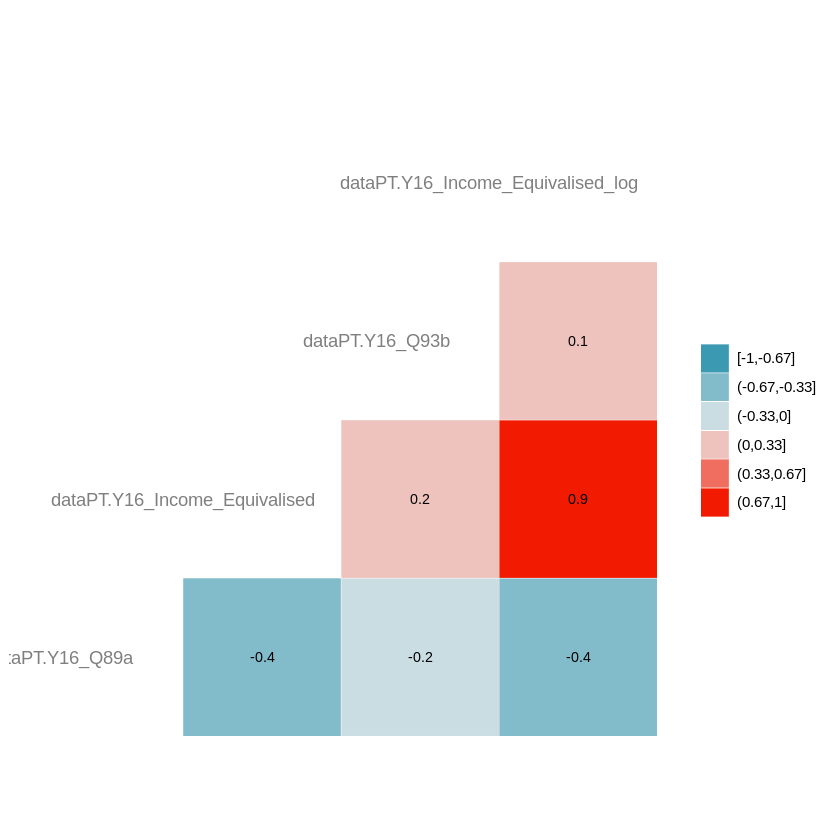

In [52]:
library(GGally)
# Convert data to numeric
corr <- data.frame(lapply(dataPTsample_imp, as.integer))
# Plot the graphggcorr(using GGally)
ggcorr(corr, method = c("everything", "spearman"), nbreaks = 6,
hjust = 0.8,label = TRUE, label_size = 3, color = "grey50")

### Set levels

In [0]:
#dataPTsample$dataPT.Y16_Income_Equivalised_levels <- cut(dataPTsample$dataPT.Y16_Income_Equivalised, c(0,26,351,682,842,2624,6091))
#dataPTsample$dataPT.Y16_Income_Equivalised_levels <- cut(dataPTsample$dataPT.Y16_Income_Equivalised, c(0,26,351,682,842,2624,6091))

## Probit Regression

A probit regression is a version of the generalized linear model used to model dichotomous outcome variables. It uses the inverse standard normal distribution as a linear combination of the predictors. The binary outcome variable Y is assumed to have a Bernoulli distribution with parameter $p$ (where the success probability is $p\in(0,1)$). Hence, the probit link function is

$$\Phi^{-1}(\pi_{i}) = X_{i}\beta + \varepsilon _{i}$$

where

$$\Phi(Z) = \int_{-\propto}^{Z}\frac{1}{\sqrt2\pi}e^{\frac{1}{2}t^{2}}dt.$$


This is the cumulative normal distribution
$\Phi$ That is, given any Z-score, $\Phi(Z)\in[0,1]$

So we would say that
$$Y =\Phi(X\beta + \varepsilon)$$
$$\Phi^{-1}(Y)= X\beta + \varepsilon$$
$$Y′ = X\beta + \varepsilon$$

Link function is $F(Y) = \Phi^{-1}(Y)$ 


In [53]:
No_Predictor <-glm(dataPTsample_imp$dataPT.Y16_Q89a~1,dataPTsample_imp,family = binomial(link= "probit"))
summary(No_Predictor)


Call:
glm(formula = dataPTsample_imp$dataPT.Y16_Q89a ~ 1, family = binomial(link = "probit"), 
    data = dataPTsample_imp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8808  -0.8808  -0.8808   1.5065   1.5065  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.46353    0.02055  -22.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5055.3  on 4024  degrees of freedom
Residual deviance: 5055.3  on 4024  degrees of freedom
AIC: 5057.3

Number of Fisher Scoring iterations: 4


In [54]:
library(stargazer)
stargazer(No_Predictor, type = 'text', no.space = TRUE)


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 





                      Dependent variable:    
                  ---------------------------
                        dataPT.Y16_Q89a      
---------------------------------------------
Constant                   -0.464***         
                            (0.021)          
---------------------------------------------
Observations                 4,025           
Log Likelihood            -2,527.652         
Akaike Inf. Crit.          5,057.303         
Note:             *p<0.1; **p<0.05; ***p<0.01


In [55]:
probit_warm <-glm(dataPTsample_imp$dataPT.Y16_Q89a ~ dataPTsample_imp$dataPT.Y16_Q93b + dataPTsample_imp$dataPT.Y16_Income_Equivalised_log, dataPTsample_imp,family = binomial(link= "probit"))
summary(probit_warm)


Call:
glm(formula = dataPTsample_imp$dataPT.Y16_Q89a ~ dataPTsample_imp$dataPT.Y16_Q93b + 
    dataPTsample_imp$dataPT.Y16_Income_Equivalised_log, family = binomial(link = "probit"), 
    data = dataPTsample_imp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2931  -0.8270  -0.5981   1.0910   2.8489  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                         4.35373    0.21500  20.250
dataPTsample_imp$dataPT.Y16_Q93b2                  -0.66724    0.06933  -9.624
dataPTsample_imp$dataPT.Y16_Q93b98                 -1.23316    0.34654  -3.559
dataPTsample_imp$dataPT.Y16_Q93b99                 -4.52756   57.93593  -0.078
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -0.66302    0.03327 -19.928
                                                   Pr(>|z|)    
(Intercept)                                         < 2e-16 ***
dataPTsample_imp$dataPT.Y16_Q93b2                   < 2

In [56]:
library(stargazer)
stargazer(probit_warm, type = 'text', no.space = TRUE)


                                      Dependent variable:    
                                  ---------------------------
                                        dataPT.Y16_Q89a      
-------------------------------------------------------------
dataPT.Y16_Q93b2                           -0.667***         
                                            (0.069)          
dataPT.Y16_Q93b98                          -1.233***         
                                            (0.347)          
dataPT.Y16_Q93b99                           -4.528           
                                           (57.936)          
dataPT.Y16_Income_Equivalised_log          -0.663***         
                                            (0.033)          
Constant                                   4.354***          
                                            (0.215)          
-------------------------------------------------------------
Observations                                 4,025           
Log Lik

Both dataPT.Y16_Q93b and dataPT.Y16_Income_Equivalised_log are statistically significant. 

The probit regression coefficients give the change in the z-score or probit index for a one unit change in the predictor.

* For a one unit increase in dataPT.Y16_Income_Equivalised_log the z-score decreases -0.621

* For factor variables (dataPT.Y16_Q93), with no arreas (referece group), increase:
* dataPT.Y16_Q93b2, the z-score decreaces by 0.777.
* dataPT.Y16_Q93b98 (refusal to answer), the z-score decreaces by 1.474.


In [57]:
confint(probit_warm)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,2.5 %,97.5 %
(Intercept),3.9478292,4.7635270
dataPTsample_imp$dataPT.Y16_Q93b2,-0.8032180,-0.5318283
dataPTsample_imp$dataPT.Y16_Q93b98,-1.9615468,-0.5900161
dataPTsample_imp$dataPT.Y16_Q93b99,NA,7.2802573
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log,-0.7263493,-0.6003090


In [58]:
coeftest(probit_warm, vcov. = vcovHC, type = "HC1")

ERROR: ignored

The estimated model equation is

$$ˆP(warm, arreas, income)= Φ−4.129164 (constant) - 0.777284 (b2) -1.473603(b98) - 0.621163 (Log Y16 Income Equivalised)$$

* (constant) given that all predictors are set to their mean values.

Coefficient interpretation: 

* An increase in x increases/decreases the likelihood that y=1 (makes that outcome more/less likely). In other words, an increase in x makes the outcome of 1 more or less likely.
*  It is interpreted the sign of the coefficient but not the magnitude. The magnitude cannot be interpreted using the coefficient because different models have different scales of coefficients. The regression probit coefficients differ by a scale factor (and therefore we cannot interpret the magnitude of the coefficients).

* Arrears or refusal (in comparison to no arreas), individuals higher household income less likely to not having the ability to keep the house warmn



Marginal Effects

In [59]:
library("mfx")
probitmfx(dataPTsample_imp$dataPT.Y16_Q89a ~ dataPTsample_imp$dataPT.Y16_Q93b + dataPTsample_imp$dataPT.Y16_Income_Equivalised_log, dataPTsample_imp)

Loading required package: sandwich

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: MASS

Loading required package: betareg



Call:
probitmfx(formula = dataPTsample_imp$dataPT.Y16_Q89a ~ dataPTsample_imp$dataPT.Y16_Q93b + 
    dataPTsample_imp$dataPT.Y16_Income_Equivalised_log, data = dataPTsample_imp)

Marginal Effects:
                                                        dF/dx  Std. Err.
dataPTsample_imp$dataPT.Y16_Q93b2                  -0.2524478  0.0271449
dataPTsample_imp$dataPT.Y16_Q93b98                 -0.2608094  0.0306956
dataPTsample_imp$dataPT.Y16_Q93b99                 -0.2983414  0.0076604
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -0.2298097  0.0115417
                                                          z     P>|z|    
dataPTsample_imp$dataPT.Y16_Q93b2                   -9.3000 < 2.2e-16 ***
dataPTsample_imp$dataPT.Y16_Q93b98                  -8.4966 < 2.2e-16 ***
dataPTsample_imp$dataPT.Y16_Q93b99                 -38.9461 < 2.2e-16 ***
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -19.9112 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



#### Marginal effects interpretation: 

* It is interpreted both the sign and the magnitude of the marginal effects.

* The marginal effects at the mean and the average marginal effects are almost identical.

* An increase in x increases (decreases) the probability that y=1 by the marginal effect expressed as a percent.
  -  For dummy independent variables, the marginal effect is expressed in comparison to the base category (x=0).
  -  For continuous independent variables, the marginal effect is expressed for a one-unit change in x.

* No Arreas, are -0.297662 (30%) more likely to not have ability to have house warmn (in comparison with no arreas)
Refusal are -0.293661 (30%) more likely to not have the abiliuty to have house warmn (in comparison with no arreas)

* Log transformed variables require one more step, because for them a one-unit increase in 𝑥 means multiplying 𝑥 by the base (in this case 𝑒).In this case, the marginal effects that would obtain for log transformed predictor would show the change in 𝑃𝑟(𝑦) for a 2.7182818285-fold change in 𝑥. 

* For each additional € of (log) income, individuals are (-0.220872 * e), 2.7182818285-fold change in 𝑥, (2.7182818285*-0.220872) % more probability to have ability to have house harm).

* The result is the average change in the probability 


In [60]:
xtabs(~dataPT.Y16_Q89a + dataPT.Y16_Q93b,dataPTsample_imp)

               dataPT.Y16_Q93b
dataPT.Y16_Q89a    1    2   98   99
              0  158 2553   19    1
              1  249 1042    3    0

In [62]:
# Probit model average marginal effects
ProbitScalar <- mean(dnorm(predict(probit_warm, type = "link")))
ProbitScalar * coef(probit_warm)

(Intercept) 
                                         1.3517002 
                 dataPTsample_imp$dataPT.Y16_Q93b2 
                                        -0.2071571 
                dataPTsample_imp$dataPT.Y16_Q93b98 
                                        -0.3828592 
                dataPTsample_imp$dataPT.Y16_Q93b99 
                                        -1.4056692 
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log 
                                        -0.2058464

Multiple Regression With k Independent Variables
Generally, the dependent variable Y may depend on k different independent variables. Thus in practice we are often faced with a multiple regression model:
Yi= β0+β1X1i+...+βkXki+ϵi,i=1,...,N

we can think of the term  β0=β0⋅1, i.e. as the coefficient of a constant term.

A single coefficientβj measures the effect of a unit change in  Xjon the expected value of Y, ceteris paribus (holding all else constant):

Using Partial Effects at the Average (PEA):

* a unit increase in the sample average value of educ results in a 0.0356 increase in the probability of returning to the labor force ;
* a unit increase in the sample average value of age results in a 0.018698 decrease in the probability of returning to the labor force ;
if the sample average number of kids under the age of 6, kidslt6 increases by one, then the probability of returning to the labor force changes by  −0.411591+0.096475⋅

* kids ge6 if the average number of exper increases by one, then the probability of returning to the labor force changes by  0.039023−0.000573⋅(2⋅exper).







In [69]:
APE_probit = mfx::probitmfx(formula = probit_warm$formula, data = probit_warm$data, atmean = FALSE)
print(APE_probit$mfxest)

                                                        dF/dx   Std. Err.
dataPTsample_imp$dataPT.Y16_Q93b2                  -0.2291372 0.024732571
dataPTsample_imp$dataPT.Y16_Q93b98                 -0.2572150 0.037082891
dataPTsample_imp$dataPT.Y16_Q93b99                 -0.3190708 0.009076746
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -0.2058464 0.008868800
                                                            z         P>|z|
dataPTsample_imp$dataPT.Y16_Q93b2                   -9.264595  1.958194e-20
dataPTsample_imp$dataPT.Y16_Q93b98                  -6.936217  4.027391e-12
dataPTsample_imp$dataPT.Y16_Q93b99                 -35.152552 1.062590e-270
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -23.210176 3.593990e-119


Using (Average Partial Effect (APE):

* a unit increase in educ results in the sample average estimated increase of 0.0299 in the probability of returning to the labor force;
* a unit increase in age results in the sample average estimated decrease of 0.015705 in the probability of returning to the labor force;
* a unit increase in kidslt6 results results in the sample average estimated change of −0.01252+0.081028⋅
kdsge6.

Note: this is similar to the PEA expression, which stems from the fact that the partial derivative with respect to kidsge6 returns −0.01252+0.081028⋅kidsge6. Since APE averages all the partial effects, kidsge6 turns into its average  
kidsge6. In contrast, PEA already uses kidsge6 , but the expressions become equivalent, although with different coefficients.

In [64]:
print(round(coef(summary(probit_warm)), 5))

                                                   Estimate Std. Error
(Intercept)                                         4.35373    0.21500
dataPTsample_imp$dataPT.Y16_Q93b2                  -0.66724    0.06933
dataPTsample_imp$dataPT.Y16_Q93b98                 -1.23316    0.34654
dataPTsample_imp$dataPT.Y16_Q93b99                 -4.52756   57.93593
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -0.66302    0.03327
                                                     z value Pr(>|z|)
(Intercept)                                         20.24966  0.00000
dataPTsample_imp$dataPT.Y16_Q93b2                   -9.62411  0.00000
dataPTsample_imp$dataPT.Y16_Q93b98                  -3.55851  0.00037
dataPTsample_imp$dataPT.Y16_Q93b99                  -0.07815  0.93771
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -19.92830  0.00000


Interpreation on follows a similar idea to the logit, with the difference being that instead of the log-odds-ratio we now have the inverse normal cdf of the probability,  Φ−1(pi).

Consequently, it makes more sense to evaluate the PEA and APE

In [65]:
PEA_probit = mfx::probitmfx(formula = probit_warm$formula, data = probit_warm$data, atmean = TRUE)
print(PEA_probit$mfxest)

                                                        dF/dx  Std. Err.
dataPTsample_imp$dataPT.Y16_Q93b2                  -0.2524478 0.02714492
dataPTsample_imp$dataPT.Y16_Q93b98                 -0.2608094 0.03069561
dataPTsample_imp$dataPT.Y16_Q93b99                 -0.2983414 0.00766036
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -0.2298097 0.01154173
                                                            z        P>|z|
dataPTsample_imp$dataPT.Y16_Q93b2                   -9.300002 1.404427e-20
dataPTsample_imp$dataPT.Y16_Q93b98                  -8.496637 1.951619e-17
dataPTsample_imp$dataPT.Y16_Q93b99                 -38.946125 0.000000e+00
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -19.911193 3.254745e-88


In [67]:
APE_probit = mfx::probitmfx(formula = probit_warm$formula, data = probit_warm$data, atmean = FALSE)
print(APE_probit$mfxest)

                                                        dF/dx   Std. Err.
dataPTsample_imp$dataPT.Y16_Q93b2                  -0.2291372 0.024732571
dataPTsample_imp$dataPT.Y16_Q93b98                 -0.2572150 0.037082891
dataPTsample_imp$dataPT.Y16_Q93b99                 -0.3190708 0.009076746
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -0.2058464 0.008868800
                                                            z         P>|z|
dataPTsample_imp$dataPT.Y16_Q93b2                   -9.264595  1.958194e-20
dataPTsample_imp$dataPT.Y16_Q93b98                  -6.936217  4.027391e-12
dataPTsample_imp$dataPT.Y16_Q93b99                 -35.152552 1.062590e-270
dataPTsample_imp$dataPT.Y16_Income_Equivalised_log -23.210176 3.593990e-119


The interpretation of PEA and APE of the probit model are analogous to the logit model - a unit increase in the (average, if PEA) regressor results in the specified change (or average change in the case of APE) in the probability.

Marginal effects show the change in probability when the predictor, or independent, variable increases by one unit. For continuous variables this represents the instantaneous change given that the ‘unit’ may be very small. For binary variables, the change is from 0 to 1, so one ‘unit’ as it is usually thought.

As in the multiple linear regression case, the intercept does not have a meaningful interpretation.


### Goodness of fit measures

In [70]:
table5 <- table(true = dataPTsample_imp$dataPT.Y16_Q89a, pred = round(fitted(probit_warm)))
table5

    pred
true    0    1
   0 2479  252
   1  889  405

In [71]:
prop.table(table5)

    pred
true         0         1
   0 0.6159006 0.0626087
   1 0.2208696 0.1006211

In [0]:
predicted.data <- data.frame(
  probability.of.hd=probit_warm$fitted.values,
  warm=dataPTsample_imp$dataPT.Y16_Q89a)

In [0]:
predicted <- predict(probit_warm, dataPTsample_imp, type="response")

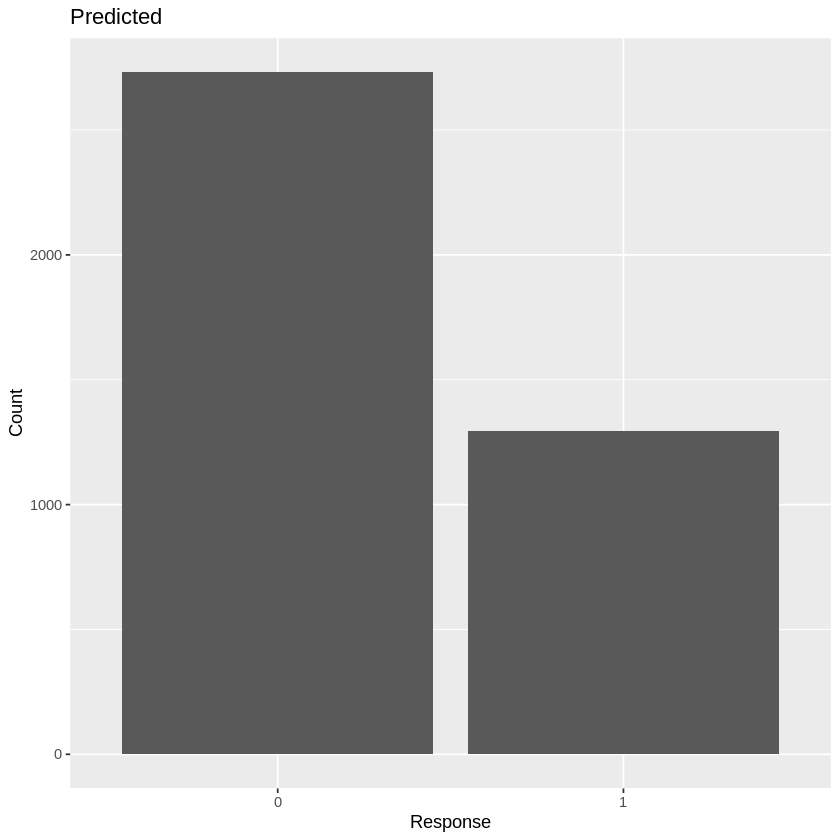

In [74]:
#plot(predicted.data$warm)
g4 <- ggplot(predicted.data, aes(warm))
# Number of cars in each class:
g4 + geom_bar() + labs(title= "Predicted",  y="Count", x = "Response")

In [75]:
100 - (59.27 + 11.97)

[1] 28.76

71.24% (59.27% + 11.97) correctly classified and 28.76 missclasfied

In [90]:
# McFadden's Pseudo R-squared
probit0 <- update(probit_warm, formula = . ~ 1)
#probit0<-update(probit, formula= dataPTsample_imp$dataPT.Y16_Q89a ~ 1)
McFadden<- 1 - as.vector(logLik(probit_warm)/logLik(probit0))
pseudoR2 <- 1 - (probit_warm$deviance) / (probit_warm$null.deviance)
pseudoR2
McFadden

[1] 0.1259657

[1] 0.1259657

The Pseudo Pseudo R-squared) was 12,5%, implying that the model explained only about 12,5% 71% of the deviations in the probability of dataPTsample_imp$dataPT.Y16_Q89a.

## With interation terms (arreas and income)



In [0]:
mod2 <- glm(dataPT.Y16_Q89a ~ (dataPT.Y16_Q93b + dataPT.Y16_Income_Equivalised_log)^2, 
             data=dataPTsample_imp, na.action="na.exclude",  family="binomial") 

In [78]:
mod2


Call:  glm(formula = dataPT.Y16_Q89a ~ (dataPT.Y16_Q93b + dataPT.Y16_Income_Equivalised_log)^2, 
    family = "binomial", data = dataPTsample_imp, na.action = "na.exclude")

Coefficients:
                                        (Intercept)  
                                             6.8434  
                                   dataPT.Y16_Q93b2  
                                            -0.4057  
                                  dataPT.Y16_Q93b98  
                                             0.5640  
                                  dataPT.Y16_Q93b99  
                                           -11.7978  
                  dataPT.Y16_Income_Equivalised_log  
                                            -1.0387  
 dataPT.Y16_Q93b2:dataPT.Y16_Income_Equivalised_log  
                                            -0.1092  
dataPT.Y16_Q93b98:dataPT.Y16_Income_Equivalised_log  
                                            -0.4196  
dataPT.Y16_Q93b99:dataPT.Y16_Income_Equivalised_log  
 

In [0]:
modinteration = probitmfx(dataPT.Y16_Q89a ~ (dataPT.Y16_Q93b + dataPT.Y16_Income_Equivalised_log^2), 
             data=dataPTsample_imp)

In [86]:
modinteration

Call:
probitmfx(formula = dataPT.Y16_Q89a ~ (dataPT.Y16_Q93b + dataPT.Y16_Income_Equivalised_log^2), 
    data = dataPTsample_imp)

Marginal Effects:
                                       dF/dx  Std. Err.        z     P>|z|    
dataPT.Y16_Q93b2                  -0.2524478  0.0271449  -9.3000 < 2.2e-16 ***
dataPT.Y16_Q93b98                 -0.2608094  0.0306956  -8.4966 < 2.2e-16 ***
dataPT.Y16_Q93b99                 -0.2983414  0.0076604 -38.9461 < 2.2e-16 ***
dataPT.Y16_Income_Equivalised_log -0.2298097  0.0115417 -19.9112 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

dF/dx is for discrete change for the following variables:

[1] "dataPT.Y16_Q93b2"  "dataPT.Y16_Q93b98" "dataPT.Y16_Q93b99"

With intarations there is no gain (no significance)

## Residuals

In the probit model, the inverse standard normal distribution of the probability is modeled as a linear combination of the predictors.

### Detecting heteroscedasticty
One issue that often raises concerns in statistical inference is that of heteroscedasticity, when the error term has non constant variance. Heteroscedasticity can bias the statistical inference and lead to improper standard errors, confidence intervals, and p-values. In ordinary linear regression, this topic has been covered extensively. Not much has been proposed in the literature for categorical models.

Residuals and Diagnostics for Binary and Ordinal Regression Models: An Introduction to the sure Package
https://journal.r-project.org/archive/2018/RJ-2018-004/RJ-2018-004.pdf

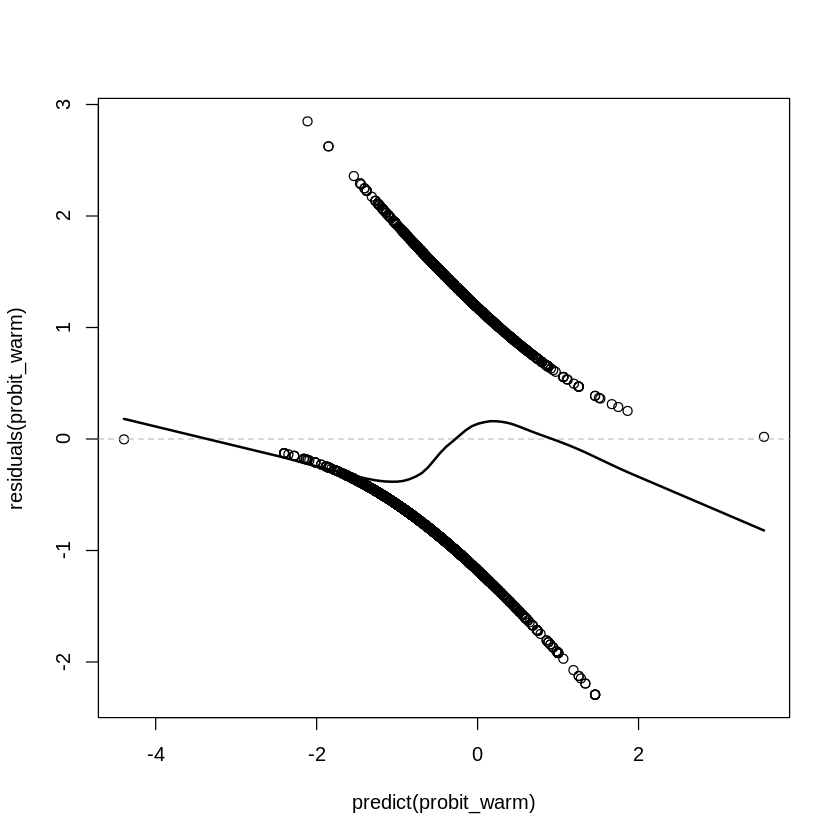

In [92]:
plot(predict(probit_warm),residuals(probit_warm))
abline(h=0,lty=2,col="grey")
lines(lowess(predict(probit_warm),residuals(probit_warm)),col="black",lwd=2)

In [94]:
#Sums of squares:
deviance(probit_warm)

[1] 4418.509

In [95]:
sum(residuals(probit_warm, type = "deviance")^2)

[1] 4418.509

In [96]:
sum(residuals(probit_warm, type = "pearson")^2)

[1] 4043.438

### Bakground

* Energy poverty in Portugal: Combining vulnerability mapping with household interviews
(https://ligar.adene.pt/wp-content/uploads/2019/10/Artigo-Energy-poverty-in-Portugal.pdf)

* An Empirical Estimation of Energy Poverty in Poor South African Households
(https://www.semanticscholar.org/paper/An-Empirical-Estimation-of-Energy-Poverty-in-Poor-Ismail/8edc74fc94e47b6f7889a8dfb13ad71a352924bf)

* Qualifying and quantifying fuel poverty across the
European Union using consensual indicators.
https://www.eagacharitabletrust.org/app/uploads/2016/03/h_thomsoneufuelpoverty.pdf

* Selecting Indicators to Measure Energy Poverty Under the Pilot Project ‘Energy Poverty – Assessment of the Impact of the Crisis and Review of Existing and Possible New Measures in the Member States (https://ec.europa.eu/energy/sites/ener/files/documents/Selecting%20Indicators%20to%20Measure%20Energy%20Poverty.pdf)

* STUDY ON THE APPLICATION OF THE SOCIAL ENERGY
TARIFF IN PORTUGAL (https://publicadministration.un.org/unpsa/Portals/0/UNPSA_Submitted_Docs/2019/6681792d-c839-4e02-a3c6-74671ce9babe/File%201_2020%20UNPSA_ASET-Automatic%20Social%20Energy%20Tariff_Evaluation%20Report_26112019_115858_364a97ae-b028-4834-9fb4-2f42bdb43809.pdf?ver=2019-11-26-115858-290)

* Health, Well-Being and Energy Poverty in Europe: A Comparative Study of 32 European Countries
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5486270/)

* Energy poverty measures and the identification of the
energy poor: A comparison between the utilitarian
and multidimensional approaches in Chile
https://www.econstor.eu/bitstream/10419/204512/1/1678631272.pdf)

* Energy poverty measures and the identification of the
energy poor: A comparison between the utilitarian
and multidimensional approaches in Chile (http://enr-network.org/wp-content/uploads/ENERGYPOVERTY-EnRPositionPaper-Energypoverty-Jan-2019.pdf)



### References: 

Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf (Chapter 17, pg 583 et seq.) 

chapter 17 
Limited Dependent Variable Models and Sample Selection
Corrections 583
17.1 Logit and Probit Models for Binary
Response 584
Specifying Logit and Probit Models 584
Maximum Likelihood Estimation of Logit and Probit Models 587
Testing Multiple Hypotheses 588
Interpreting the Logit and Probit
Estimates 589

Microeconometrics - Methods and Applications - A. Colin Cameron Pravin K. Trivedi- microeconometrics-methods-and-applications.pdf

PART FOUR
Models for Cross-Section
Data 461

Econometric Analysis of Cross Section and Panel Data

Je¤rey M. Wooldridge

The Linear Probability Model for Binary Response 454
15.3 Index Models for Binary Response: Probit and Logit 457